<a href="https://colab.research.google.com/github/barrancosantiagofede/barrancosantiagofede/blob/main/IPN_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="background: linear-gradient(to right, #771C19, #771C19, #C0C4CC); color: white; font-style: italic; padding: 10px 20px; border-radius: 5px; text-align: left; font-weight:700;">
        Desempeño Académico IPN
</h1>


## Importación de librerías

In [4]:
#! pip install gspread

In [5]:
#LIBRERÍAS BÁSICAS
import pandas as pd
import numpy as np

#EDA
import matplotlib.pyplot as plt
import seaborn as sns

#PREPROCESAMIENTO
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

#MODELADO
from sklearn.cluster import KMeans

#UTILS
import gspread

## Carga de Datos

In [8]:
sa = gspread.service_account(filename='service_account.json')
sh = sa.open('ProyectoDM')

In [9]:
worksheet = sh.sheet1
data = worksheet.get_all_records()
df = pd.DataFrame(data)

## EDA

### Vista previa de los datos

In [10]:
df.head()

,Marca temporal,Dirección de correo electrónico,¿A qué escuela perteneces?,¿Cuál es tu promedio global?,¿Cuántas materias has reprobado a lo largo de tu trayectoria?,¿Qué edad tienes?,¿Cuál es tu género?,¿Tienes dependientes económicos?,¿Tienes personas a tu cuidado?,¿Te sientes apoyado por tu familia?,...,¿Eres foráneo?,¿Cuánto tiempo tardas en llegar a tu escuela en minutos?,¿Cuántas horas diarias dedicas al estudio fuera de clases?,Para validar la lectura de esta encuesta selecciona la opción 3 horas,"¿Cuántas horas trabajas al día? \nSi no trabajas, escribe '0'.","¿Padeces de alguna enfermedad crónica (Por ejemplo: diabetes, hipertensión, asma, etc.)?",¿Te gusta tu carrera?,¿Piensas ejercer la carrera?,¿Cuántas horas duermes en promedio al día?,¿Con qué frecuencia utilizas herramientas de IA?
0,28/11/2024 11:44:10,ax3l.riv@gmail.com,ESCOM,8.4,0.0,20,Masculino,No,No,5,...,Sí,15.0,3.0,3 horas,0.0,No,Sí,Sí,6.0,4
1,28/11/2024 12:18:18,bejarjesus032@gmail.com,ESCOM,6.0,1.0,19,Masculino,Sí,No,5,...,No,60.0,1.0,3 horas,0.0,No,Sí,Sí,7.0,4
2,28/11/2024 12:18:44,concepciondaniel90@gmail.com,ESCOM,7.7,0.0,19,Masculino,No,No,5,...,No,60.0,1.0,3 horas,5.0,No,Sí,Sí,5.0,4
3,28/11/2024 12:18:57,hernandezakira33@gmail.com,ESCOM,6.4,1.0,19,Masculino,No,No,5,...,No,60.0,3.0,3 horas,1.0,No,Indiferente,Sí,5.0,1
4,28/11/2024 12:19:02,betohacker033@gmail.com,ESCOM,6.5,4.0,21,Masculino,No,No,5,...,No,40.0,4.0,3 horas,0.0,No,Sí,Sí,6.0,3


In [11]:
df = df.rename(columns={df.columns[0]: 'Fecha',
                        df.columns[1]: 'Correo',
                        df.columns[2]: 'Escuela',
                        df.columns[3]: 'Promedio',
                        df.columns[4]: 'N_reprobadas',
                        df.columns[5]: 'Edad',
                        df.columns[6]: 'Genero',
                        df.columns[7]: 'Deps',
                        df.columns[8]: 'P_a_cargo',
                        df.columns[9]: 'Apoyo Familiar',
                        df.columns[10]: 'R_Beca',
                        df.columns[11]: 'Foraneo',
                        df.columns[12]: 'T_traslado (min)',
                        df.columns[13]: 'Hrs_estudio',
                        df.columns[14]: 'P_Validacion',
                        df.columns[15]: 'Hrs_trabajo',
                        df.columns[16]: 'Enfermedad cronica',
                        df.columns[17]: 'Gusto por la carrera',
                        df.columns[18]: 'Ejercer la carrera',
                        df.columns[19]: 'Hrs_sueno',
                        df.columns[20]: 'Frecuencia del uso de IA'
                        }
               )
df.head()

,Fecha,Correo,Escuela,Promedio,N_reprobadas,Edad,Genero,Deps,P_a_cargo,Apoyo Familiar,...,Foraneo,T_traslado (min),Hrs_estudio,P_Validacion,Hrs_trabajo,Enfermedad cronica,Gusto por la carrera,Ejercer la carrera,Hrs_sueno,Frecuencia del uso de IA
0,28/11/2024 11:44:10,ax3l.riv@gmail.com,ESCOM,8.4,0.0,20,Masculino,No,No,5,...,Sí,15.0,3.0,3 horas,0.0,No,Sí,Sí,6.0,4
1,28/11/2024 12:18:18,bejarjesus032@gmail.com,ESCOM,6.0,1.0,19,Masculino,Sí,No,5,...,No,60.0,1.0,3 horas,0.0,No,Sí,Sí,7.0,4
2,28/11/2024 12:18:44,concepciondaniel90@gmail.com,ESCOM,7.7,0.0,19,Masculino,No,No,5,...,No,60.0,1.0,3 horas,5.0,No,Sí,Sí,5.0,4
3,28/11/2024 12:18:57,hernandezakira33@gmail.com,ESCOM,6.4,1.0,19,Masculino,No,No,5,...,No,60.0,3.0,3 horas,1.0,No,Indiferente,Sí,5.0,1
4,28/11/2024 12:19:02,betohacker033@gmail.com,ESCOM,6.5,4.0,21,Masculino,No,No,5,...,No,40.0,4.0,3 horas,0.0,No,Sí,Sí,6.0,3


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Fecha                     1783 non-null   object 
 1   Correo                    1783 non-null   object 
 2   Escuela                   1783 non-null   object 
 3   Promedio                  1783 non-null   float64
 4   N_reprobadas              1783 non-null   float64
 5   Edad                      1783 non-null   int64  
 6   Genero                    1783 non-null   object 
 7   Deps                      1783 non-null   object 
 8   P_a_cargo                 1783 non-null   object 
 9   Apoyo Familiar            1783 non-null   int64  
 10  R_Beca                    1783 non-null   object 
 11  Foraneo                   1783 non-null   object 
 12  T_traslado (min)          1783 non-null   float64
 13  Hrs_estudio               1783 non-null   float64
 14  P_Valida

In [13]:
df.describe()

,Promedio,N_reprobadas,Edad,Apoyo Familiar,T_traslado (min),Hrs_estudio,Hrs_trabajo,Hrs_sueno,Frecuencia del uso de IA
count,1783.000000,1783.000000,1783.000000,1783.000000,1783.00000,1783.000000,1783.000000,1783.000000,1783.000000
mean,8.027684,2.027201,21.213685,4.251262,86.75687,3.594335,2.052159,5.635053,3.014582
std,0.996178,2.664676,4.550600,1.045388,43.68405,10.822695,10.506309,5.701469,1.169578
min,0.000000,0.000000,17.000000,1.000000,10.00000,0.000000,0.000000,2.000000,1.000000
25%,7.600000,0.000000,20.000000,4.000000,50.00000,2.000000,0.000000,5.000000,2.000000
50%,8.070000,1.000000,21.000000,5.000000,90.00000,3.000000,0.000000,5.500000,3.000000
75%,8.650000,3.000000,22.000000,5.000000,120.00000,4.000000,3.000000,6.000000,4.000000
max,10.000000,34.000000,190.000000,5.000000,180.00000,240.000000,300.000000,240.000000,5.000000


Se pueden observar distintos datos inusuales:
- El promedio mínimo es 0. Se podría asumir que los registros provienen de alumnos de primer semestre. Sin embargo se requiere de un análisis más profundo de estos casos.
- El número máximo de materias reprobadas es 34, lo que es imposible según el reglamento institucional.
- El número máximo de horas diarias dedicadas al estudio es 240 ¡IMPOSIBLE!
- El número máximo de horas trabajadas al día es 300. De nuevo ¡IMPSIBLE!
- El número máximo de horas dormidas al día es 240. Más de lo mismo

In [14]:
df.describe(include='object')

,Fecha,Correo,Escuela,Genero,Deps,P_a_cargo,R_Beca,Foraneo,P_Validacion,Enfermedad cronica,Gusto por la carrera,Ejercer la carrera
count,1783,1783,1783,1783,1783,1783,1783,1783,1783,1783,1783,1783
unique,1741,1770,9,3,2,3,2,2,3,2,3,3
top,29/11/2024 10:48:56,luiss551@hotmail.com,ESCOM,Masculino,No,No,Sí,No,3 horas,No,Sí,Sí
freq,3,3,452,984,1445,1600,1254,1265,1730,1649,1489,1557


Aquí se pueden ver otros problemas.

- De las 1705 respuestas tenemos 1692 distintas, lo que implica que probablemente una persona registro distintos datos y por tanto, no podemos garantizar la fiabilidad de las respuestas con correo electrónico duplicado.
- Además, de la pregunta de validación de la encuesta, se tienen 1652 respuestas válidas a primera instancia

### Examen gráfico

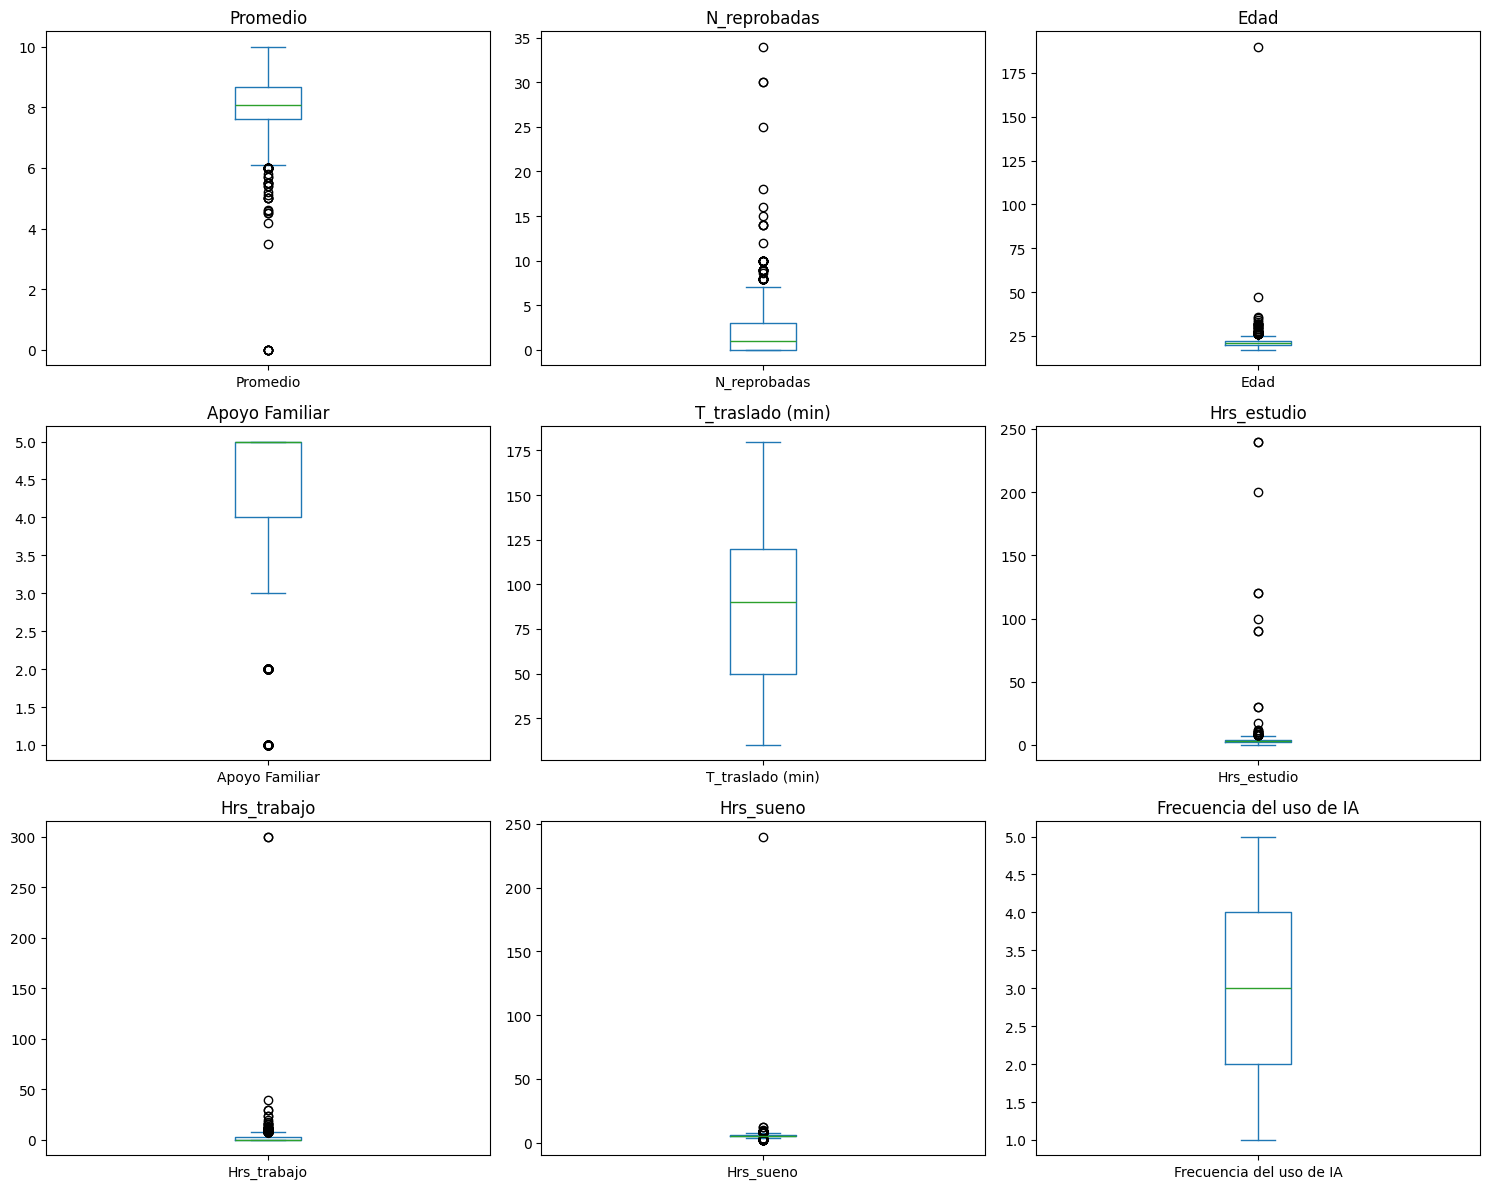

In [15]:
# ===== GRÁFICOS BÁSICOS: DISTRIBUCIÓN DE LOS DATOS NUMÉRICOS =====
numeric_columns = df.select_dtypes(include=['number']).columns.values

n_cols = 3
n_rows = -(-len(numeric_columns) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

axes = axes.flatten()

# Boxplots
for i, column in enumerate(numeric_columns):
    df[column].plot(kind='box', ax=axes[i])
    axes[i].set_title(column)

for j in range(len(numeric_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

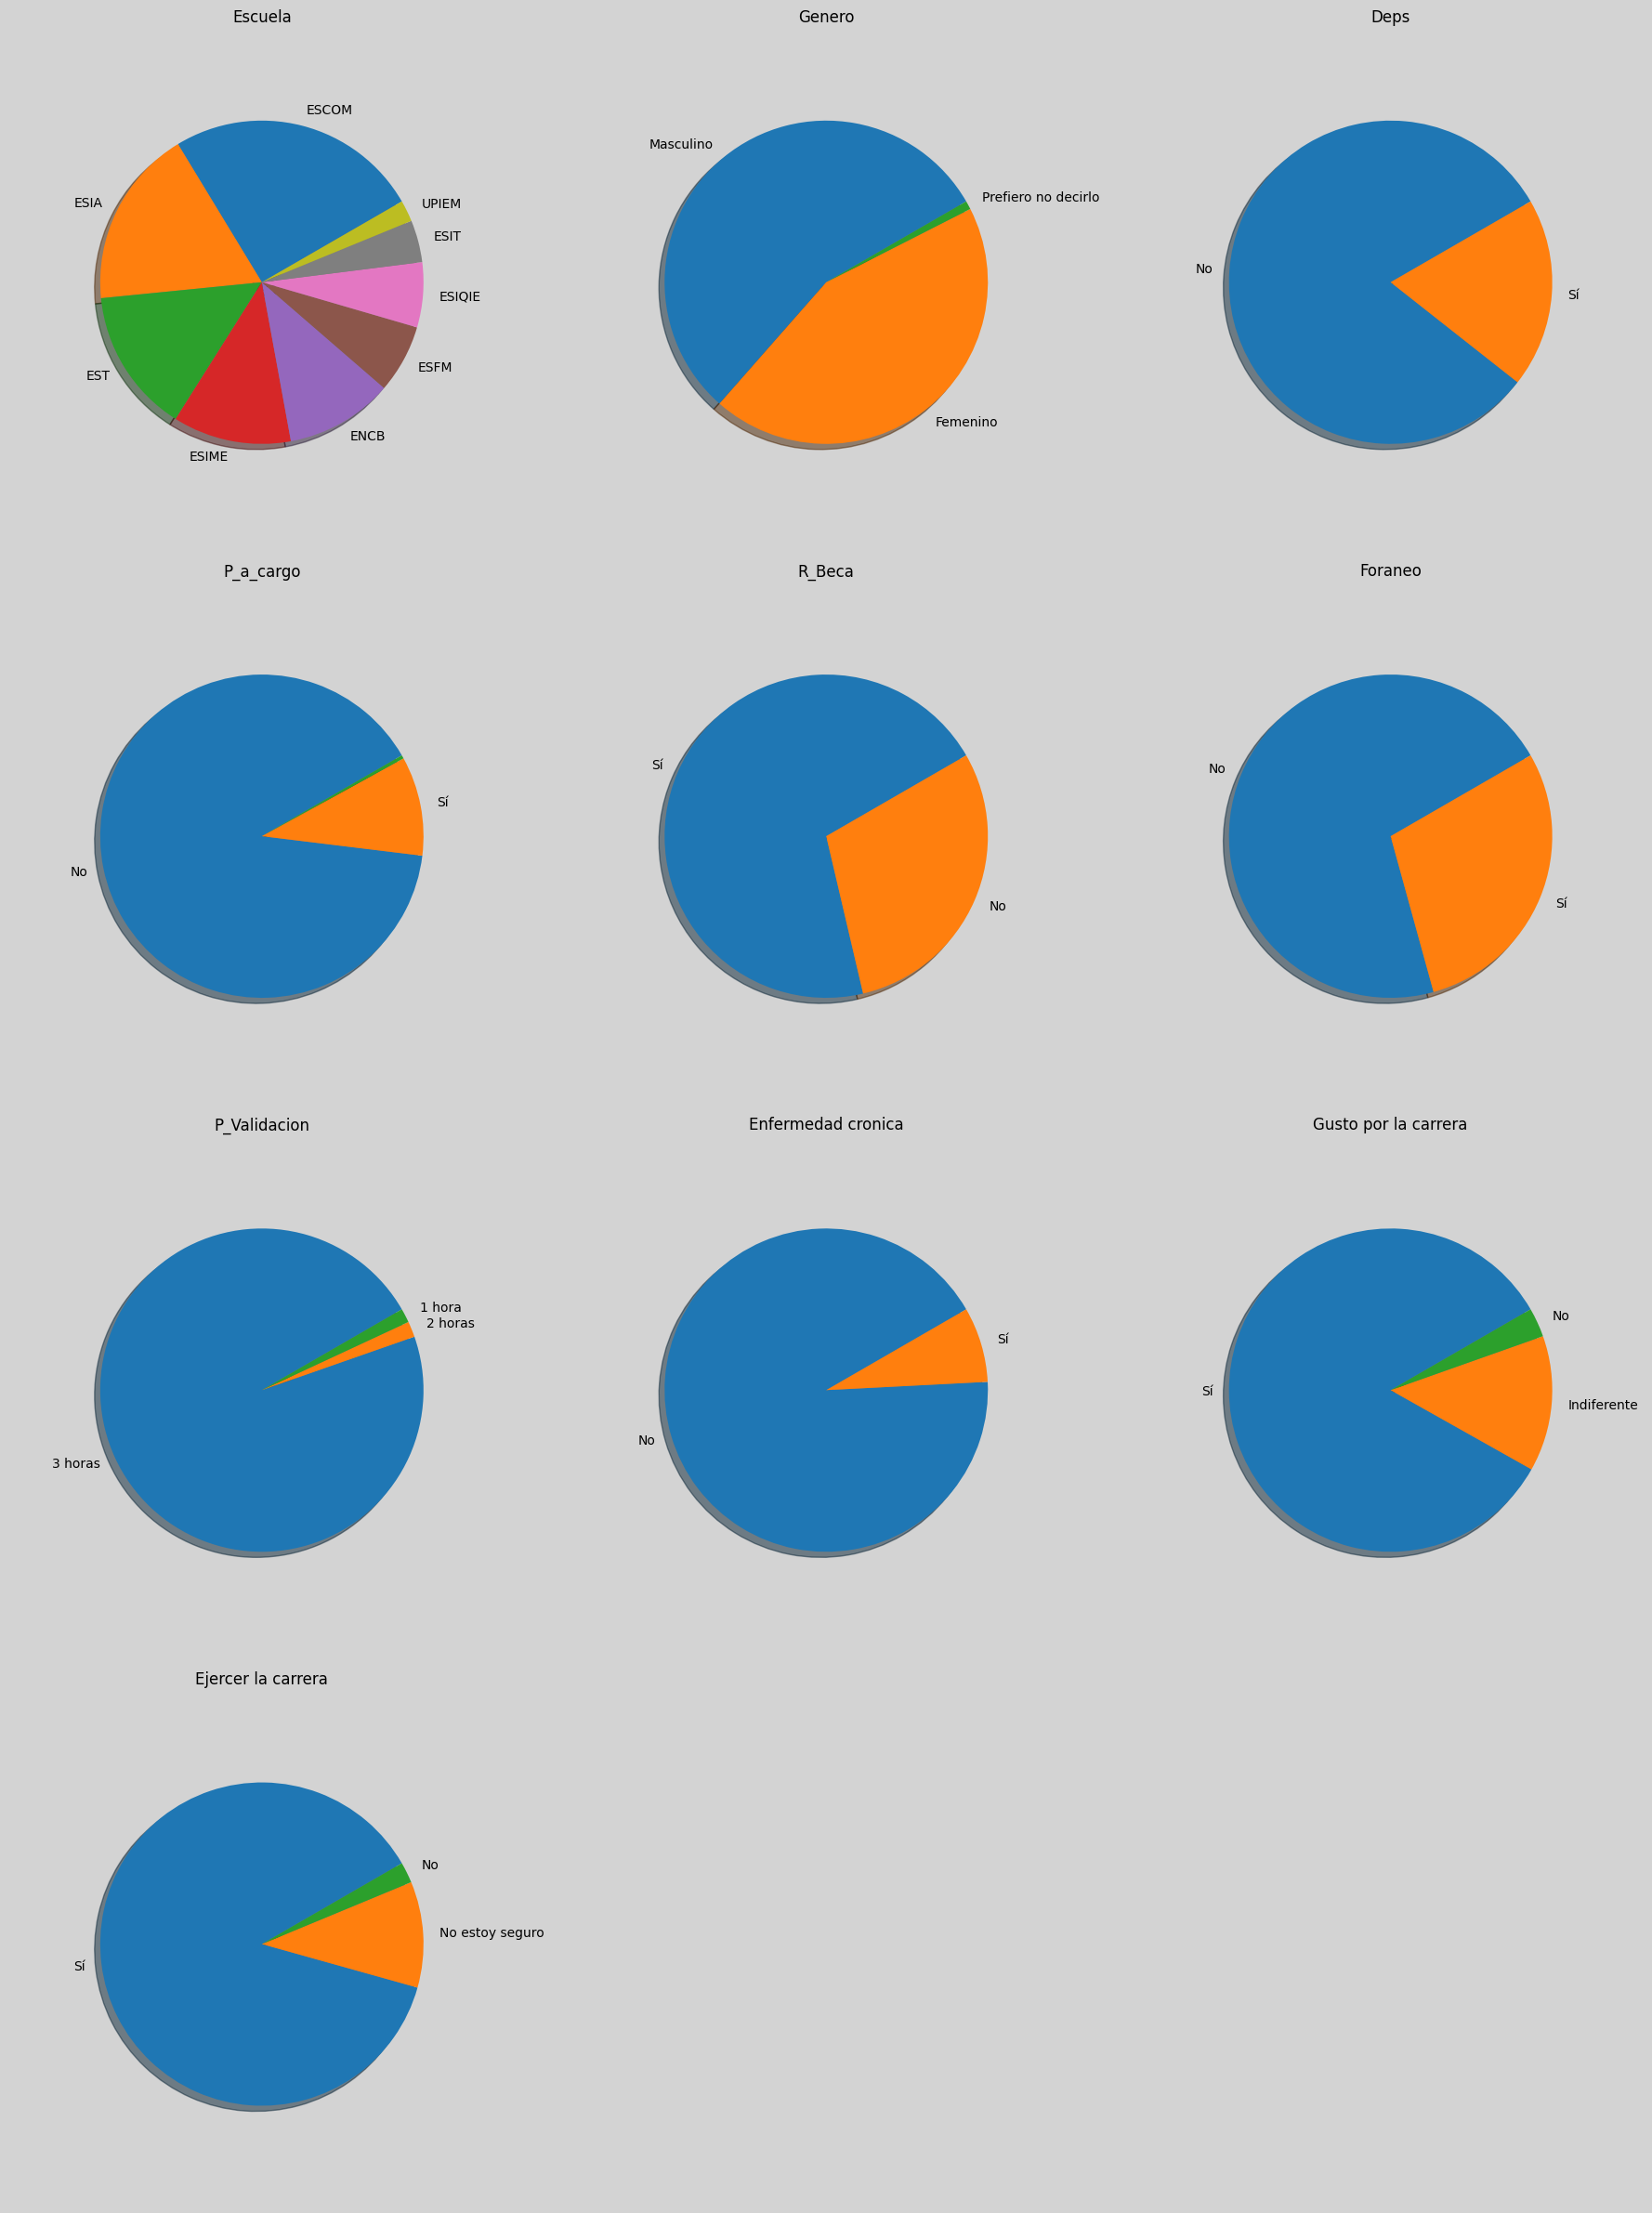

In [16]:
# ===== GRÁFICOS BÁSICOS: PROPORCIONES DE LOS DATOS CATEGÓRICOS =====
categorical_columns = df.drop(columns=['Fecha', 'Correo']).select_dtypes(include='object').columns.values

n_cols = 3
n_rows = -(-len(categorical_columns) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 6), facecolor='lightgrey')

axes = axes.flatten()

# Pasteles
for i, column in enumerate(categorical_columns):
    axes[i].pie(
        df[column].value_counts(),
        labels=df[column].value_counts().index,
        startangle=30,
        radius=0.8,
        shadow=True
    )
    axes[i].set_title(column)

for j in range(len(categorical_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

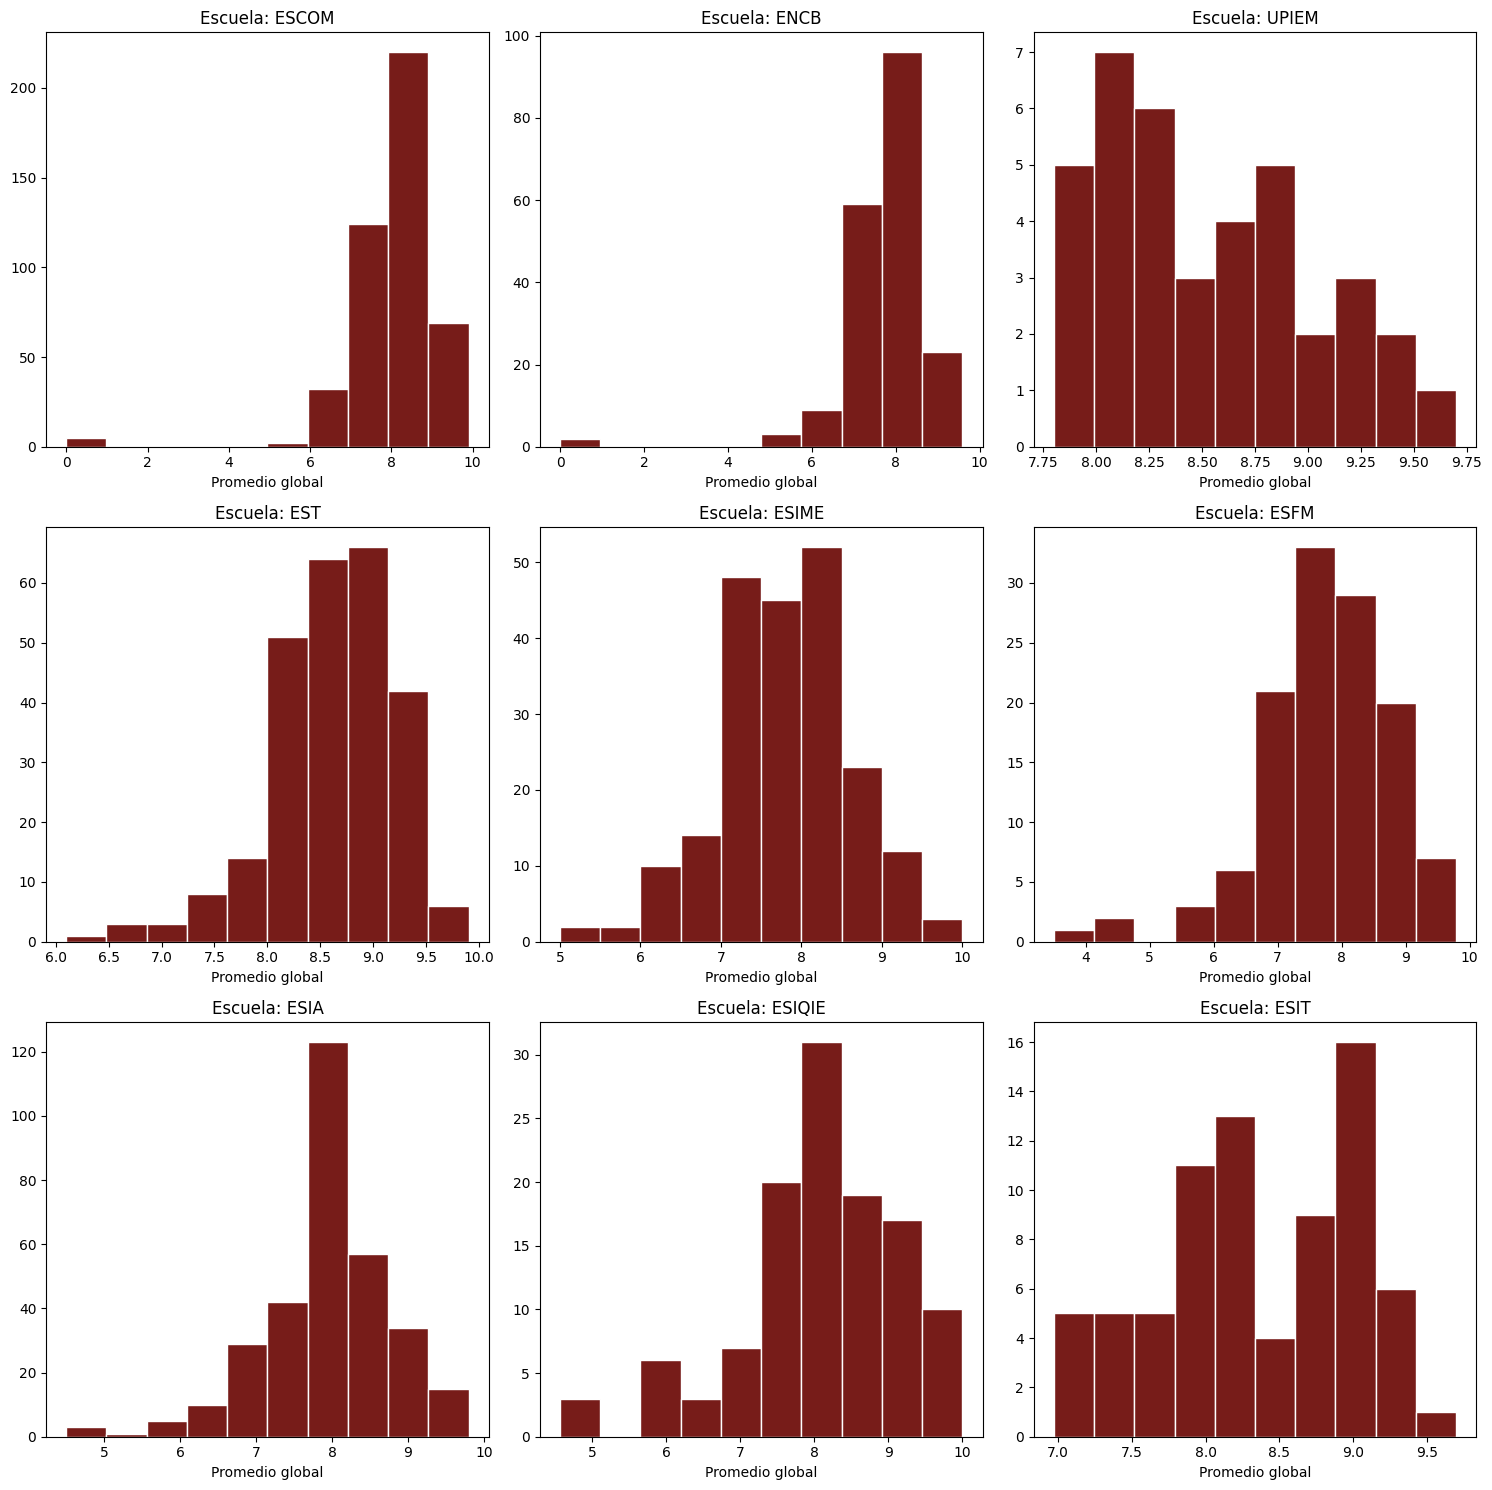

In [17]:
# Variables únicas de 'Escuela'
escuelas = df['Escuela'].unique()

# Tamaño del grid
n_cols = 3  # Número de columnas en el grid
n_rows = -(-len(escuelas) // n_cols)  # Calcula el número de filas necesarias (redondeo hacia arriba)

# Crear la figura y subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Generar los histogramas
for i, escuela in enumerate(escuelas):
    escuela_data = df[df['Escuela'] == escuela]
    axes[i].hist(escuela_data['Promedio'], bins=10, color='#771C19', edgecolor='white')
    axes[i].set_title(f'Escuela: {escuela}')
    axes[i].set_xlabel("Promedio global")

# Quitar ejes vacíos si sobran
for j in range(len(escuelas), len(axes)):
    axes[j].axis('off')

# Ajustar los espacios entre subgráficos
plt.tight_layout()
plt.show()

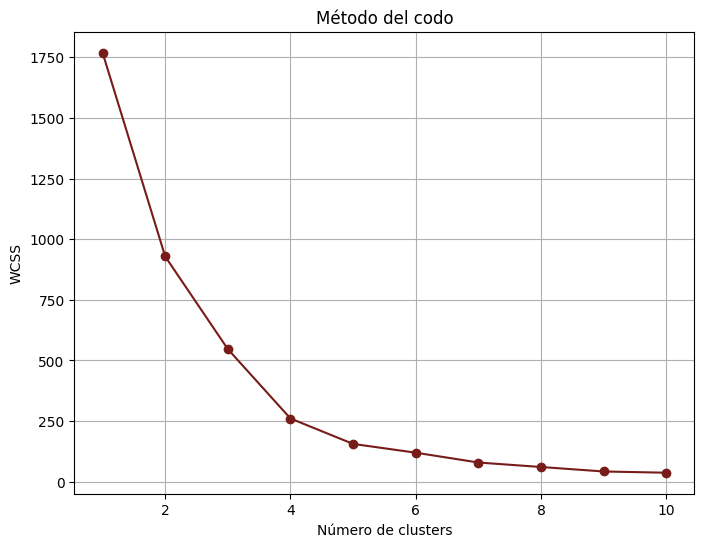

   Escuela  Cluster  Número de alumnos
0     ENCB        0                 57
1     ENCB        1                133
2     ENCB        2                  2
3    ESCOM        0                215
4    ESCOM        1                232
5    ESCOM        2                  5
6     ESFM        0                 41
7     ESFM        1                 80
8     ESFM        2                  1
9     ESIA        0                123
10    ESIA        1                196
11   ESIME        0                 62
12   ESIME        1                149
13  ESIQIE        0                 59
14  ESIQIE        1                 57
15    ESIT        0                 48
16    ESIT        1                 27
17     EST        0                195
18     EST        1                 63
19   UPIEM        0                 26
20   UPIEM        1                 12


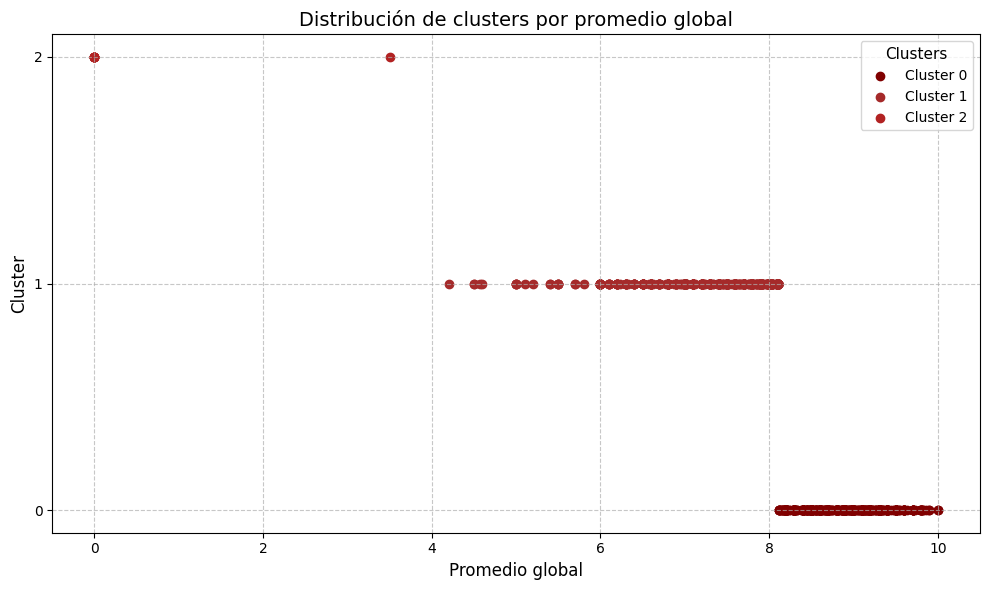

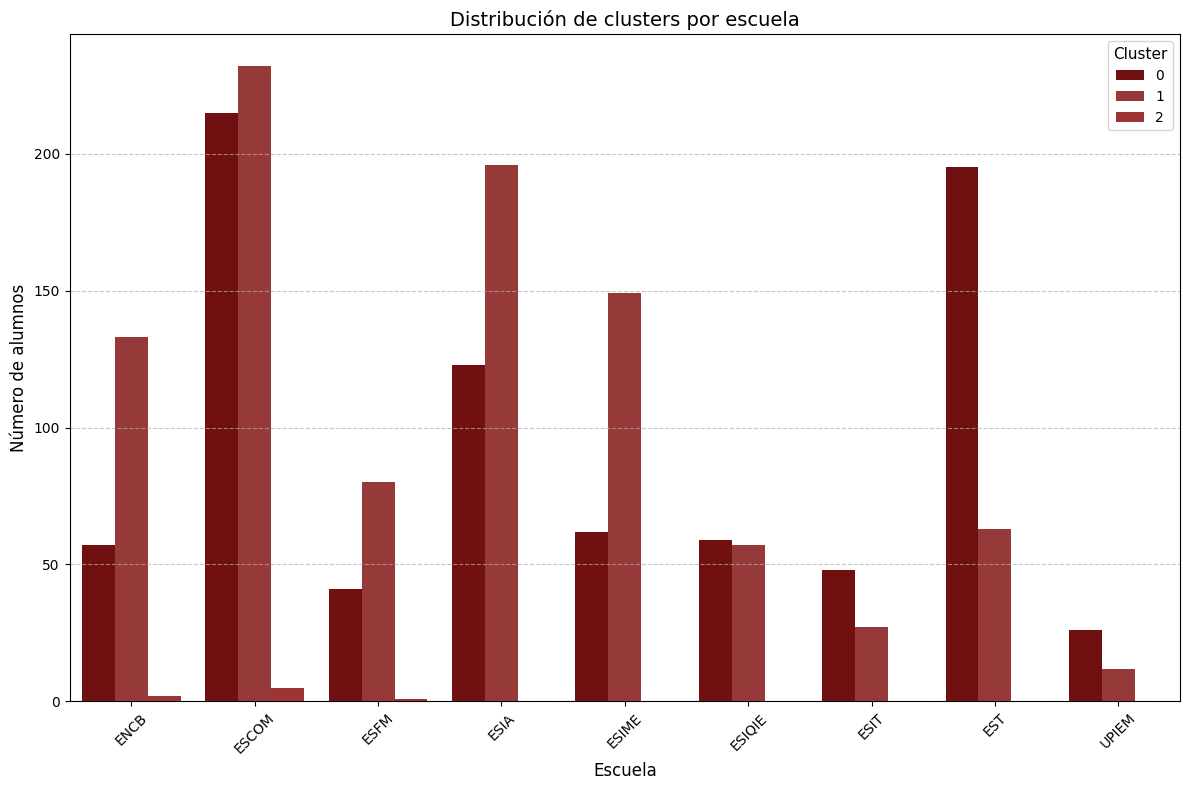

In [18]:
# ===== CLUSTERS PARA AGRUPAR ESTUDIANTES EN FUNCIÓN DEL PROMEDIO =====
x = df['Promedio'].values.reshape(-1, 1)
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='#771C19')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=0)
data = df.copy()
data['Cluster'] = kmeans.fit_predict(x)

# ---------------------------------------------------------------------------------------------------------------

cluster_distribution = data.groupby(['Escuela', 'Cluster']).size().reset_index(name='Número de alumnos')
print(cluster_distribution)

# ---------------------------------------------------------------------------------------------------------------

# Gráfico de dispersión por clusters
guinda_palette = sns.color_palette(["#800000", "#A52A2A", "#B22222", "#CD5C5C", "#E9967A"])

# Crear la figura
plt.figure(figsize=(10, 6))

# Generar el gráfico de dispersión
for cluster in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Promedio'],
        [cluster] * len(cluster_data),
        label=f'Cluster {cluster}',
        color=guinda_palette[cluster % len(guinda_palette)]  # Asignar color a cada cluster
    )

# Configuración del gráfico
plt.title('Distribución de clusters por promedio global', fontsize=14)
plt.xlabel('Promedio global', fontsize=12)
plt.ylabel('Cluster', fontsize=12)
plt.yticks(range(optimal_clusters), fontsize=10)
plt.legend(title='Clusters', fontsize=10, title_fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------------------------------------------------

# Gráfico de barras agrupadas por escuela y cluster
guinda_palette = sns.color_palette(["#800000", "#A52A2A", "#B22222"])

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(
    data=cluster_distribution,
    x='Escuela',
    y='Número de alumnos',
    hue='Cluster',
    palette=guinda_palette  # Usar la paleta personalizada
)
plt.title('Distribución de clusters por escuela', fontsize=14)
plt.xlabel('Escuela', fontsize=12)
plt.ylabel('Número de alumnos', fontsize=12)
plt.legend(title='Cluster', fontsize=10, title_fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.tight_layout()
plt.show()

Cada cluster agrupó de la mejor manera a los estudiantes según su promedio, devolviendo los siguientes resultados
* Cluster 0: Representa a los estudiantes con promedios más altos (alrededor de 8 o más).
* Cluster 1: Agrupa a los estudiantes con promedios intermedios (entre 6 y 8).
* Cluster 2: Contiene a los estudiantes con promedios bajos (por debajo de 6)

Del procedimiento anterior, se pueden apreciar algunas situaciones interesantes:

ESCOM: Tiene una alta concentración de estudiantes en los clusters 0 y 1, indicando que la mayoría de sus alumnos tienen promedios intermedios o altos.

ESIME y EST: También destacan con distribuciones significativas en los clusters 0 y 1.

Cluster 2: Está presente en menor proporción en todas las escuelas, lo que significa que son pocos los estudiantes con promedios bajos.

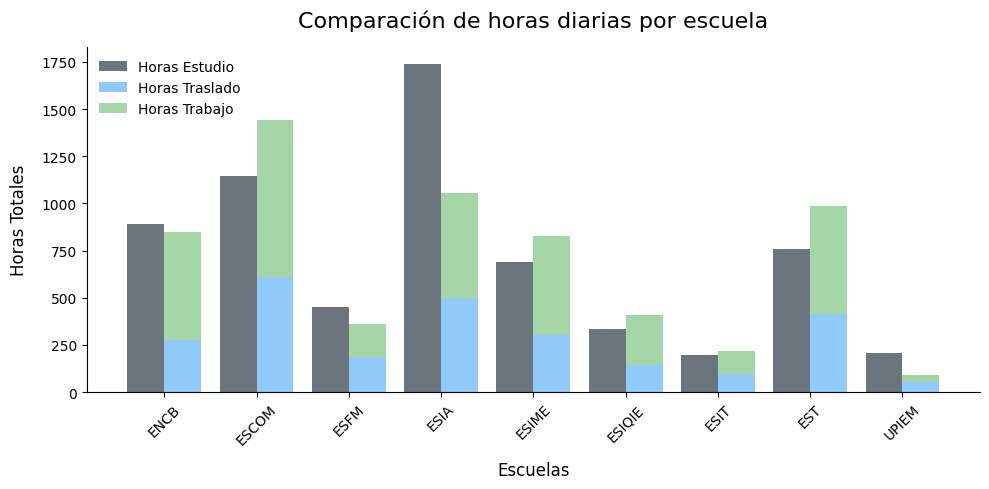

In [19]:
# ===== GRÁFICO DE BARRAS COMPARATIVAS Y BARRAS APILADAS
# CAMBIAR NOMBRES DE VARIABLES A LOS NOMBRES ACTUALES

df['T_traslado (hrs)'] = df['T_traslado (min)'] / 60

# Agrupar los datos por escuela y calcular las sumas de horas
resumen = df.groupby('Escuela').agg({
    'Hrs_estudio': 'sum',
    'T_traslado (hrs)': 'sum',
    'Hrs_trabajo': 'sum'
}).reset_index()

# Renombrar columnas para mayor claridad
resumen.columns = ['Escuela', 'Total Horas Estudio / día', 'Total Horas Traslado / día', 'Total Horas Trabajo / día']
resumen

# ------------------------------------------------------------------------------------------------------------------------------

# Configurar datos
escuelas = resumen['Escuela']
x = np.arange(len(escuelas))
width = 0.4

# Crear figura
plt.figure(figsize=(10, 5))  # Tamaño más grande

# Barras de estudio
plt.bar(x - width/2, resumen['Total Horas Estudio / día'], width, label='Horas Estudio', color='#6c757d')  # Gris suave

# Barras apiladas para traslado y trabajo
plt.bar(x + width/2, resumen['Total Horas Traslado / día'], width, label='Horas Traslado', color='#90caf9')  # Azul claro
plt.bar(x + width/2, resumen['Total Horas Trabajo / día'], width, bottom=resumen['Total Horas Traslado / día'], label='Horas Trabajo', color='#a5d6a7')  # Verde claro

# Configurar etiquetas y diseño
plt.xlabel('Escuelas', fontsize=12, labelpad=10)
plt.ylabel('Horas Totales', fontsize=12, labelpad=10)
plt.title('Comparación de horas diarias por escuela', fontsize=16, pad=15)
plt.xticks(x, escuelas, rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10, loc='upper left', frameon=False)

# Eliminar bordes superiores y derechos para diseño más limpio
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mejorar distribución y mostrar
plt.tight_layout()
plt.show()

De la gráfica, se observa que los alumnos de la ESCOM son los que más tiempo dedican a trabajar, mientras que los alumnos de la ESIA son los que más tiempo dedican a estudiar.

<ipython-input-20-19f3ccf2771f>:10: UserWarning: 
The palette list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  boxplot = sns.boxplot(


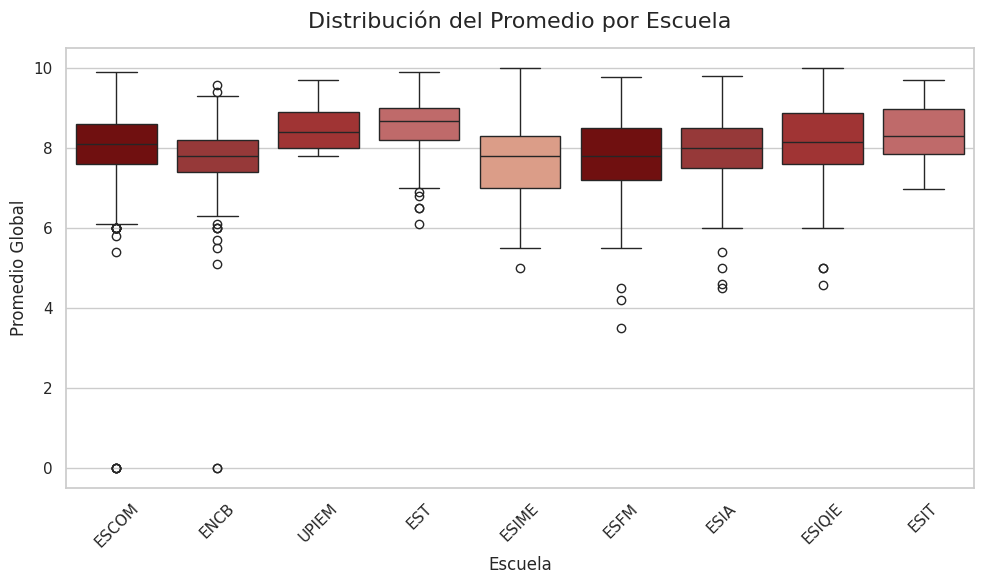

In [20]:
# ===== GRÁFICOS DE CAJAS HRS. DE SUEÑO VS PROMEDIO =====

filtered_df = df[df['Hrs_estudio'] <= 12]

# Configuración del estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de box plots
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(
    data=filtered_df,  # Usar el dataframe filtrado
    x='Escuela',       # Categorías en el eje x
    y='Promedio',      # Variable numérica en el eje y
    hue='Escuela',
    palette= sns.color_palette(["#800000", "#A52A2A", "#B22222", "#CD5C5C", "#E9967A"])
)

# Configurar etiquetas y título
plt.title('Distribución del Promedio por Escuela', fontsize=16, pad=15)
plt.xlabel('Escuela', fontsize=12)
plt.ylabel('Promedio Global', fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas si hay muchas escuelas
plt.tight_layout()

# Mostrar el gráfico
plt.show()


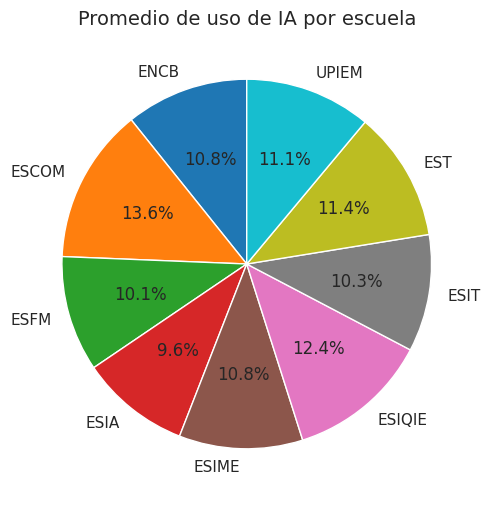

In [21]:
# ===== GRÁFICO DE PASTEL: USO DE IA POR ESCUELA.

uso_IA = df.groupby('Escuela')['Frecuencia del uso de IA'].mean()

#Gráfico
plt.figure(figsize=(10,6))
uso_IA.plot(kind='pie', autopct = '%1.1f%%', startangle=90, cmap='tab10')
plt.title('Promedio de uso de IA por escuela', fontsize = 14)
plt.ylabel('')
plt.show()

<ipython-input-22-6034aa3165e8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


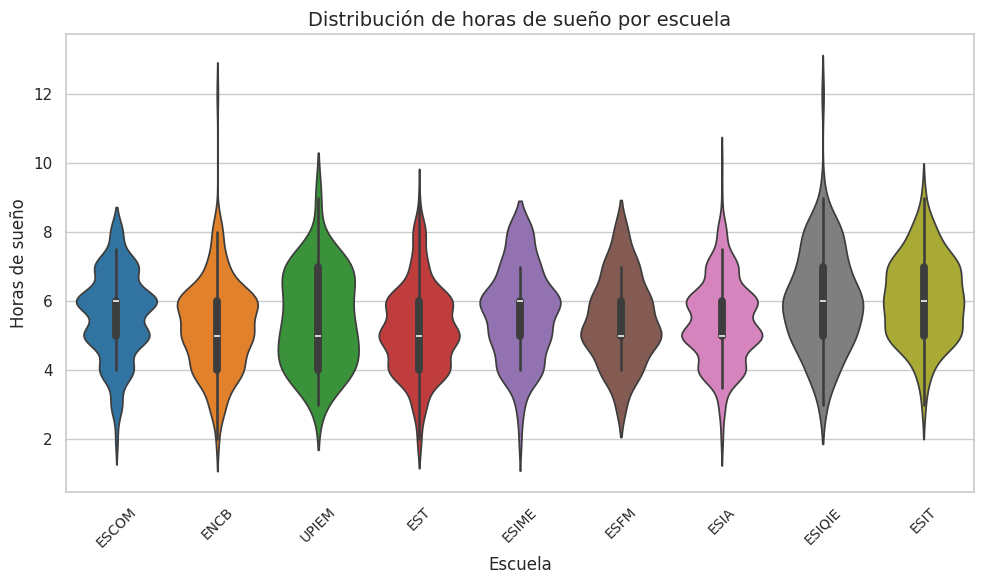

In [22]:
#===== GRÁFICOS DE VIOLÍN ESCUELA VS HRS. DE SUEÑO

filtro = df[(df['Hrs_sueno'] <= 12)]
#Gráfico
plt.figure(figsize=(10, 6))
sns.violinplot(
    x = 'Escuela',
    y = 'Hrs_sueno',
    data = filtro,
    palette='tab10'
)
plt.title('Distribución de horas de sueño por escuela', fontsize = 14)
plt.xlabel('Escuela', fontsize = 12)
plt.ylabel('Horas de sueño', fontsize = 12)
plt.xticks(rotation = 45, fontsize = 10)
plt.tight_layout()
plt.show()

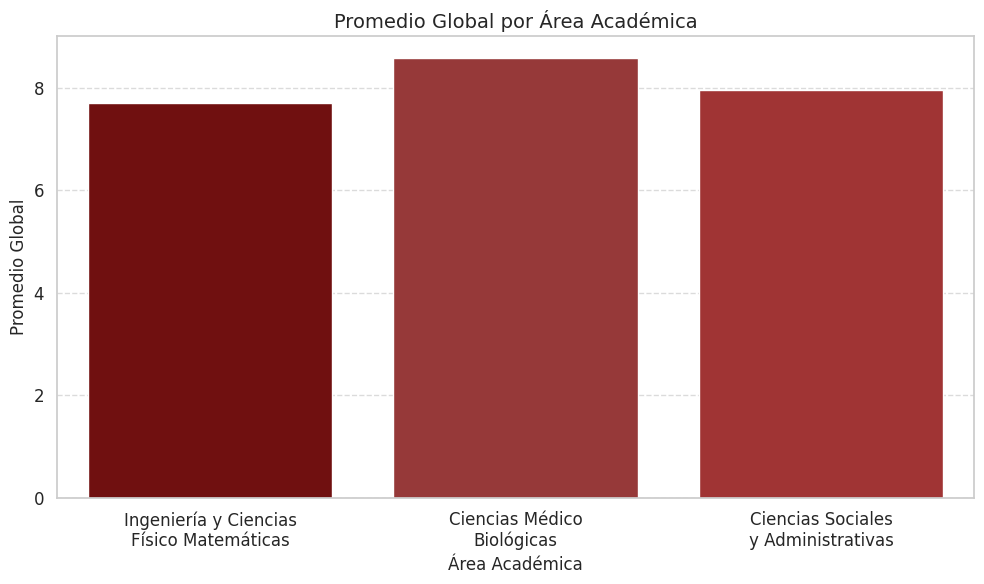

In [23]:
# ===== GRÁFICO DE BARRAS ÁREA ACADÉMICA VS PROMEDIO

# Agrupar las escuelas en áreas académicas
areas = {
    "Ingeniería y Ciencias Físico Matemáticas": ["ESCOM", "ESIA", "ESIME", "ESIQIE", "ESFM", "ESIT"],
    "Ciencias Médico Biológicas": ["ENCB"],
    "Ciencias Sociales y Administrativas": ["EST", "UPIEM"]
}

etiquetas = ['Ingeniería y Ciencias\nFísico Matemáticas',
             'Ciencias Médico\nBiológicas',
             'Ciencias Sociales\ny Administrativas']

# Asignar el área académica a cada registro
def asignar_area(escuela):
    for area, escuelas in areas.items():
        if escuela in escuelas:
            return area
    return "Otras Áreas"

df['Área Académica'] = df['Escuela'].apply(asignar_area)

# Calcular el promedio por área académica
prom_area = df.groupby('Área Académica')['Promedio'].mean().reset_index()

# Crear la gráfica de barras con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Área Académica',
    y='Promedio',
    data=prom_area,
    palette= sns.color_palette(["#800000", "#A52A2A", "#B22222"]),
    hue='Área Académica'
)

# Configurar etiquetas y título
plt.title('Promedio Global por Área Académica', fontsize=14)
plt.xlabel('Área Académica', fontsize=12)
plt.ylabel('Promedio Global', fontsize=12)
plt.xticks(ticks=range(len(etiquetas)), labels=etiquetas, rotation=0, fontsize=12, ha='center')
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


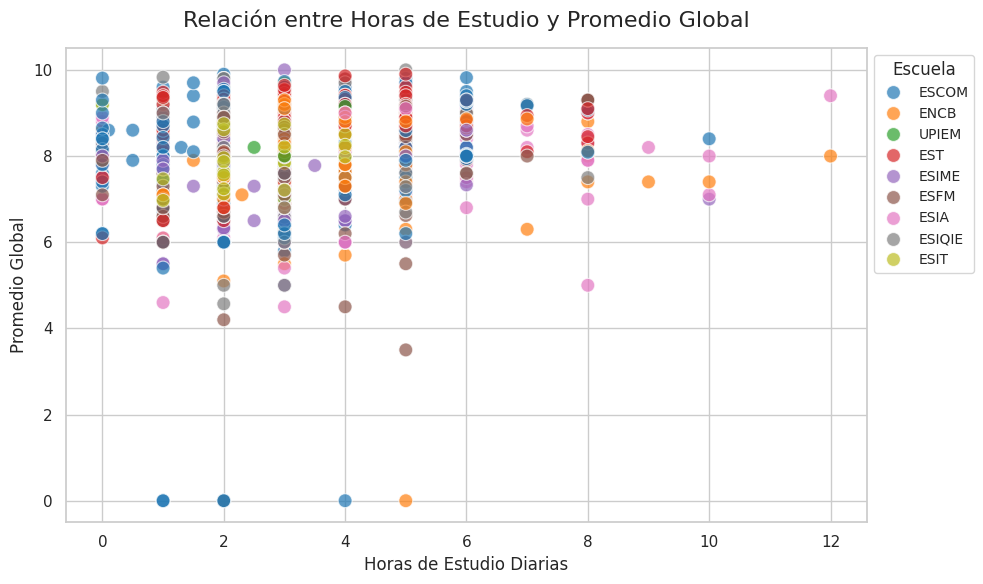

In [24]:
# ===== GRÁFICO DE DISPERSIÓN HRS. ESTUDIO VS PROMEDIO POR ESCUELA
#CAMBIAR LOS NOMBRES DE VARIABLES A LOS NOMBRES ACTUALES

# Establecer un límite razonable para las horas de estudio
limite_horas_estudio = 12  # Puedes ajustarlo si es necesario

# Filtrar los datos para eliminar outliers
df_filtrado = df[df['Hrs_estudio'] <= limite_horas_estudio]

# Verificar los datos después del filtrado
df_filtrado.describe()

# --------------------------------------------------------------------------------------------------------------------

# Crear el gráfico de dispersión con datos filtrados
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df_filtrado,
    x='Hrs_estudio',
    y='Promedio',
    hue='Escuela',  # Diferenciar por escuela
    palette='tab10',  # Colores distintivos para cada escuela
    alpha=0.7,  # Transparencia
    s=100  # Tamaño de los puntos
)

# Configurar etiquetas y diseño
plt.title('Relación entre Horas de Estudio y Promedio Global', fontsize=16, pad=15)
plt.xlabel('Horas de Estudio Diarias', fontsize=12)
plt.ylabel('Promedio Global', fontsize=12)
plt.legend(title='Escuela', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Mostrar el gráfico
plt.show()

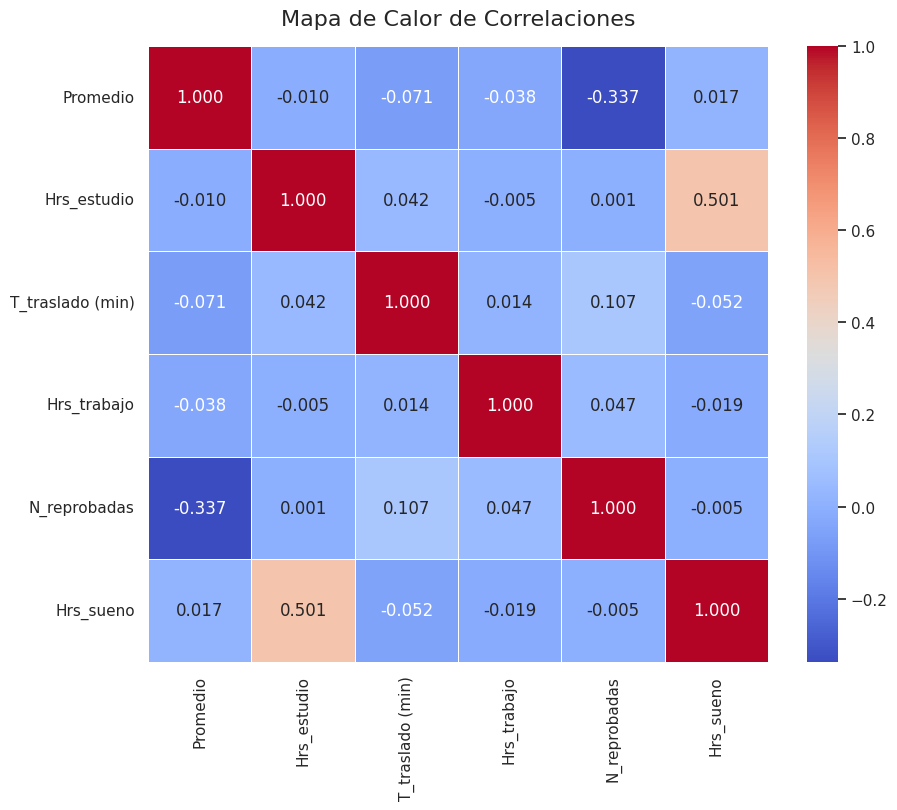

In [25]:
# MAPA DE CALOR DE CORRELACIÓN LINEAL
# MEJORAR LA SELECCIÓN DE VARIABLES NUMÉRICAS Y CAMBIAR NOMBRES DE VARIABLES A LOS NOMBRES ACTUALES

# Seleccionar las columnas numéricas relevantes
datos_numericos = df[[
    'Promedio',
    'Hrs_estudio',
    'T_traslado (min)',
    'Hrs_trabajo',
    'N_reprobadas',
    'Hrs_sueno'
]]

# Renombrar columnas para simplificar
#datos_numericos.columns = [
#    'Promedio',
#    'Hrs_estudio',
#    'T_traslado',
#    'Hrs_trabajo',
#    'N_Reprobadas',
#    'Hrs_sueno'
#]

# Calcular la matriz de correlación
correlation_matrix = datos_numericos.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Mostrar valores en las celdas
    cmap='coolwarm',  # Paleta de colores
    fmt='.3f',  # Formato de los números
    linewidths=0.5  # Líneas entre celdas
)

# Configurar el título
plt.title('Mapa de Calor de Correlaciones', fontsize=16, pad=15)

# Mostrar el gráfico
plt.show()

Identificamos que existe cierta correlación positiva entre variables como las horas de estudio y horas de sueño. Por otro lado, también se aprecia cierta correlación negativa entre el promedio y la cantidad de materias reprobadas, este comportamiento tiene sentido lógico en un contexto académico, dado que más materias reprobadas indican un menor desempeño, lo cual se refleja en un promedio global más bajo.

Estas dos correlaciones caen en un rango moderado de correlación, valdría la pena explorarlas más a fondo, considerar otras variables,

In [26]:
df.head()

,Fecha,Correo,Escuela,Promedio,N_reprobadas,Edad,Genero,Deps,P_a_cargo,Apoyo Familiar,...,Hrs_estudio,P_Validacion,Hrs_trabajo,Enfermedad cronica,Gusto por la carrera,Ejercer la carrera,Hrs_sueno,Frecuencia del uso de IA,T_traslado (hrs),Área Académica
0,28/11/2024 11:44:10,ax3l.riv@gmail.com,ESCOM,8.4,0.0,20,Masculino,No,No,5,...,3.0,3 horas,0.0,No,Sí,Sí,6.0,4,0.250000,Ingeniería y Ciencias Físico Matemáticas
1,28/11/2024 12:18:18,bejarjesus032@gmail.com,ESCOM,6.0,1.0,19,Masculino,Sí,No,5,...,1.0,3 horas,0.0,No,Sí,Sí,7.0,4,1.000000,Ingeniería y Ciencias Físico Matemáticas
2,28/11/2024 12:18:44,concepciondaniel90@gmail.com,ESCOM,7.7,0.0,19,Masculino,No,No,5,...,1.0,3 horas,5.0,No,Sí,Sí,5.0,4,1.000000,Ingeniería y Ciencias Físico Matemáticas
3,28/11/2024 12:18:57,hernandezakira33@gmail.com,ESCOM,6.4,1.0,19,Masculino,No,No,5,...,3.0,3 horas,1.0,No,Indiferente,Sí,5.0,1,1.000000,Ingeniería y Ciencias Físico Matemáticas
4,28/11/2024 12:19:02,betohacker033@gmail.com,ESCOM,6.5,4.0,21,Masculino,No,No,5,...,4.0,3 horas,0.0,No,Sí,Sí,6.0,3,0.666667,Ingeniería y Ciencias Físico Matemáticas


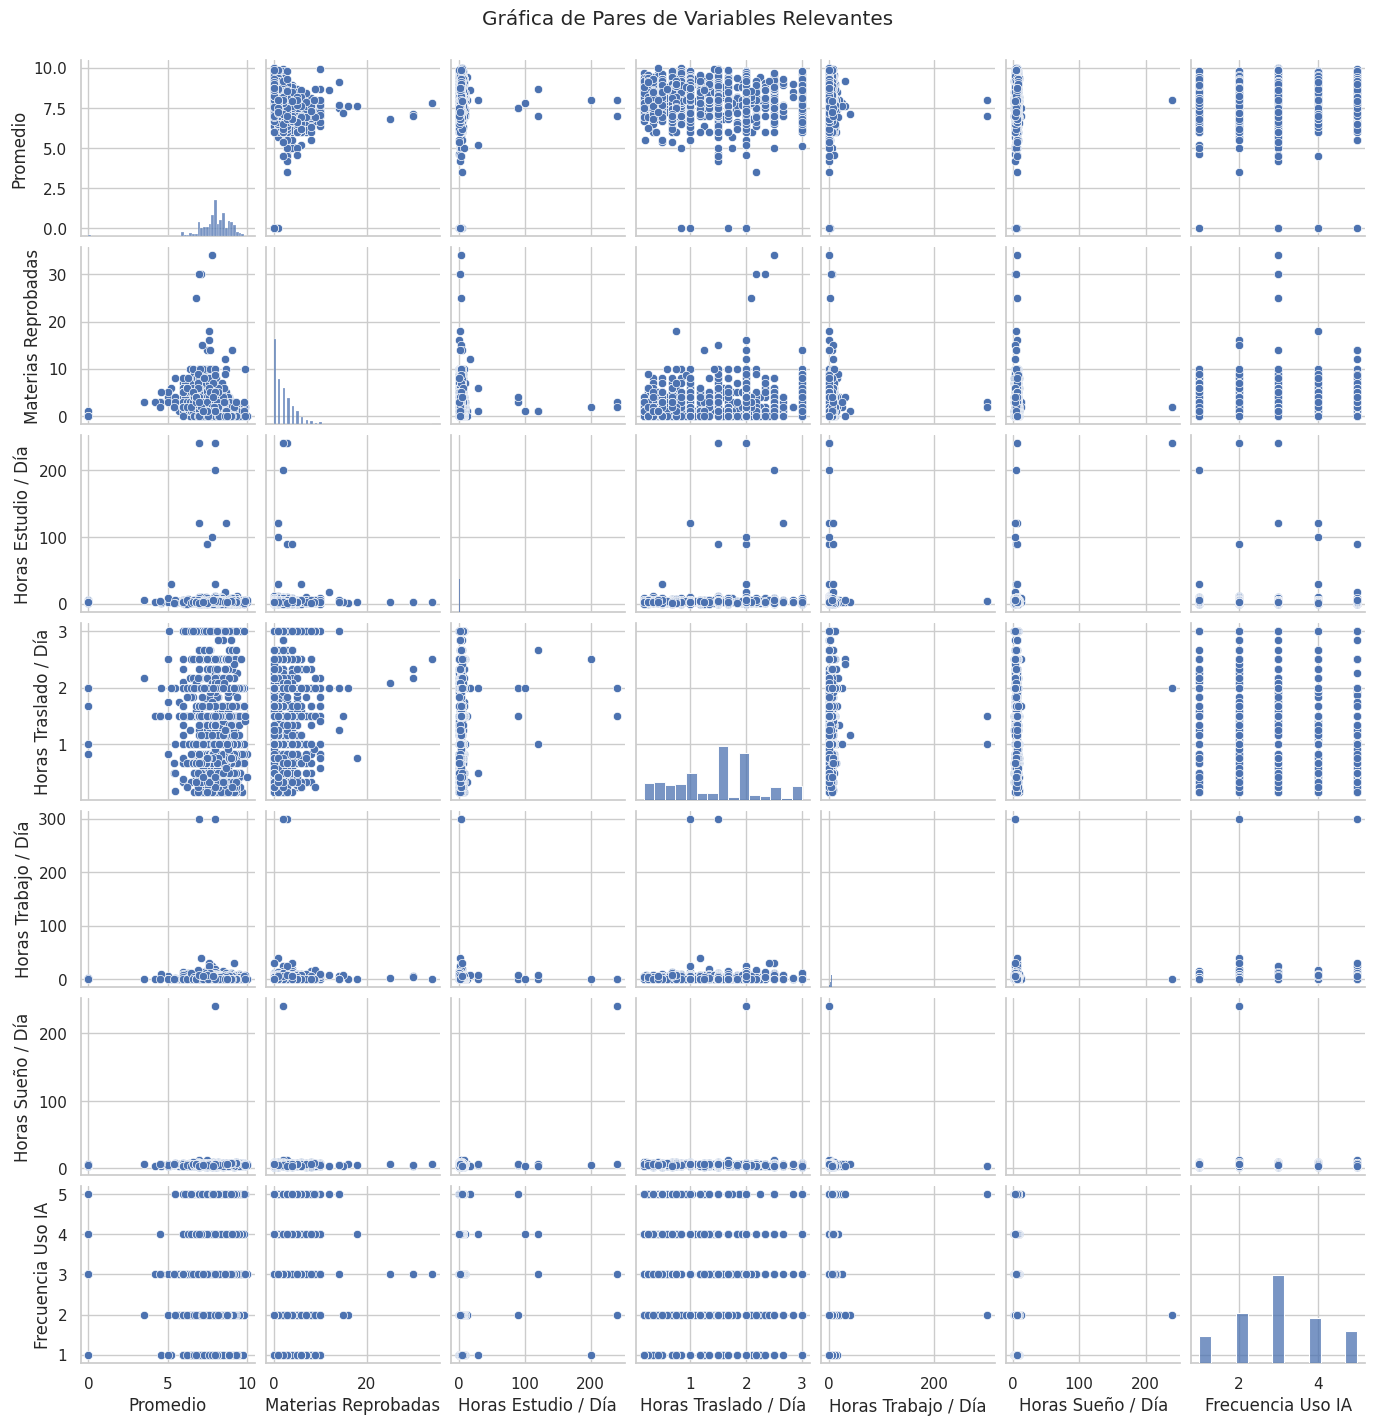

In [27]:
# GRÁFICO DE DISPERSIÓN A PARES

# Seleccionar columnas relevantes
columns_to_plot = [
    'Promedio',
    'N_reprobadas',
    'Hrs_estudio',
    'T_traslado (hrs)',
    "Hrs_trabajo",
    'Hrs_sueno',
    'Frecuencia del uso de IA'
]

# Filtrar las columnas relevantes
df_filtered = df[columns_to_plot]

# Renombrar columnas para mayor claridad en la gráfica (opcional)
df_filtered.columns = [
    'Promedio',
    'Materias Reprobadas',
    'Horas Estudio / Día',
    'Horas Traslado / Día',
    'Horas Trabajo / Día',
    'Horas Sueño / Día',
    'Frecuencia Uso IA'
]

# Generar la gráfica de pares
sns.pairplot(df_filtered, height=2)  # Ajusta el tamaño de cada subgráfico
plt.suptitle('Gráfica de Pares de Variables Relevantes', y=1.02)
plt.show()

<ipython-input-28-42210ce5a462>:9: UserWarning: 
The palette list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df_filtrado, x='Escuela', y='Promedio', palette=guinda_palette, hue='Escuela')


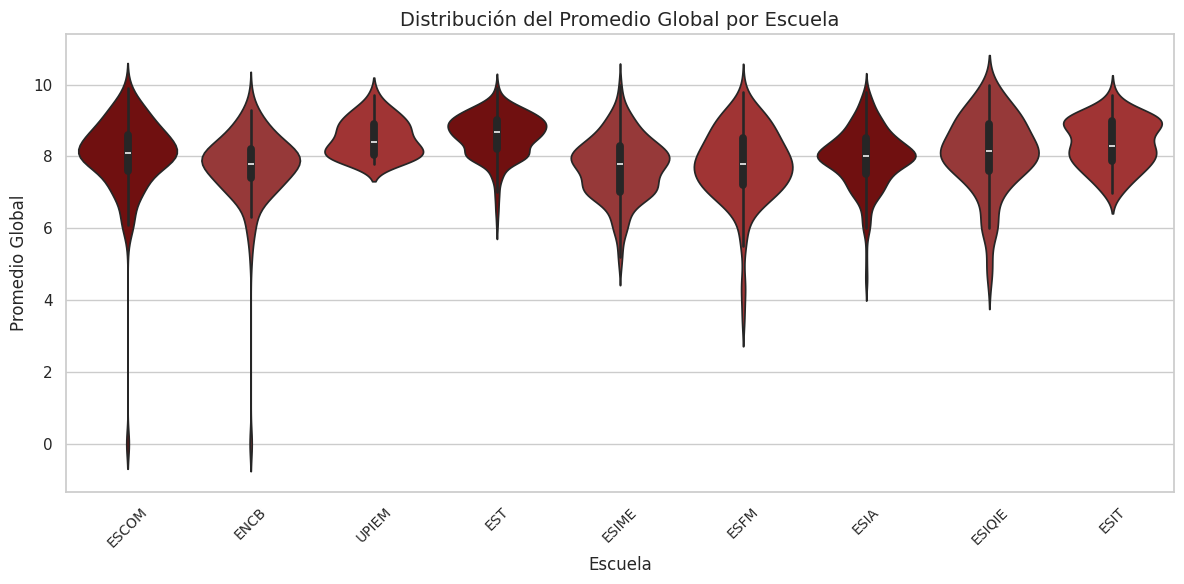

In [28]:
## ===== GRÁFICOS DE VIOLÍN PROMEDIO POR ESCUELA =====

# Filtrar el DataFrame para incluir solo las escuelas relevantes
escuelas_relevantes = ["ESCOM", "ESIA", "EST", "ESIME", "ENCB", "ESFM", "ESIQIE", "ESIT", "UPIEM"]
df_filtrado = df[df['Escuela'].isin(escuelas_relevantes)]

# Crear el gráfico de violín para el promedio global por escuela
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_filtrado, x='Escuela', y='Promedio', palette=guinda_palette, hue='Escuela')

# Configuración de la gráfica
plt.title('Distribución del Promedio Global por Escuela', fontsize=14)
plt.xlabel('Escuela', fontsize=12)
plt.ylabel('Promedio Global', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Conclusiones - gráfica de violín en promedios por escuela
1. Diferencias entre escuelas
- En top 3 se estarian EST, ESIT y UPIEM porque tienen una distribución más concentrada en los promedios altos (8-10), lo que sugiere un mejor desempeño académico en general. Además están más compactas, eso quiere decir que sus estudiantes tienen promedios dentro de un rango más definido.
- En la ESFM, ESIQIE y ESIME se observa una mayor dispersión de los promedios hacia valores bajos, lo que refleja una mayor diversidad en el rendimiento académico de sus estudiantes.
2. Outliers (valores atípicos)
- Se observan hacia promedios extremadamente bajos en ESCOM y ENCB.


In [29]:
df.columns.values

array(['Fecha', 'Correo', 'Escuela', 'Promedio', 'N_reprobadas', 'Edad',
       'Genero', 'Deps', 'P_a_cargo', 'Apoyo Familiar', 'R_Beca',
       'Foraneo', 'T_traslado (min)', 'Hrs_estudio', 'P_Validacion',
       'Hrs_trabajo', 'Enfermedad cronica', 'Gusto por la carrera',
       'Ejercer la carrera', 'Hrs_sueno', 'Frecuencia del uso de IA',
       'T_traslado (hrs)', 'Área Académica'], dtype=object)

In [30]:
#de modify:
##Despues de la sección detección de outliers, la columna P_validacion se llena de Nan, por lo que esta función toma en cuenta el df antes de esa sección ya mencionada
#Función para filtrar todas las respuestas diferentes a '3 horas' en la pregunta de validación, posteriormente se elimina la columa P_validacion porque ya no tiene sentido tenerla
print(df)
def Filtrado_Pvalidacion(df):
  df = df[df['P_Validacion'] == '3 horas']
  df = df.drop(columns=['P_Validacion'])
  return df

df = Filtrado_Pvalidacion(df)
print(df)

                    Fecha                        Correo Escuela  Promedio  \
0     28/11/2024 11:44:10            ax3l.riv@gmail.com   ESCOM      8.40   
1     28/11/2024 12:18:18       bejarjesus032@gmail.com   ESCOM      6.00   
2     28/11/2024 12:18:44  concepciondaniel90@gmail.com   ESCOM      7.70   
3     28/11/2024 12:18:57    hernandezakira33@gmail.com   ESCOM      6.40   
4     28/11/2024 12:19:02       betohacker033@gmail.com   ESCOM      6.50   
...                   ...                           ...     ...       ...   
1778   7/12/2024 18:31:19    jaldanaa2012@alumno.ipn.mx    ESIT      6.97   
1779   7/12/2024 18:32:37   avazquezd1921@alumno.ipn.mx    ESIT      8.61   
1780   7/12/2024 18:35:11    fgarciar1006@alumno.ipn.mx    ESIT      7.24   
1781   7/12/2024 19:10:54      dani.vargaas13@gmail.com    ESIT      8.75   
1782   8/12/2024 17:05:23   ggardunoc2000@alumno.ipn.mx   ESCOM      7.90   

      N_reprobadas  Edad     Genero Deps P_a_cargo  Apoyo Familiar  ...  \


In [31]:
#Función para ajustar los valores extremos dentro de x columna deseada por el método iqr, se puede usar para otra cosa que no sea promedio
#Recibe como argumento el dataframe y el nombre de la columna del dataframe
def ajustar_iqr(df, columna):
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - (1.5 * iqr)
    limite_superior = q3 + (1.5 * iqr) #se toma el factor k como 1.5

    df[columna] = np.where(df[columna] < limite_inferior, limite_inferior, df[columna])
    df[columna] = np.where(df[columna] > limite_superior, limite_superior, df[columna])

    return df #la salida es el dataframe con los valores de la columna deseada ajustados


print(df['Promedio'].describe())
#ahora para ajustar los valores del promedio
ajustar_iqr(df, 'Promedio')
print()
print(df['Promedio'].describe())

count    1730.000000
mean        8.031584
std         1.002363
min         0.000000
25%         7.600000
50%         8.090000
75%         8.670000
max        10.000000
Name: Promedio, dtype: float64

count    1730.000000
mean        8.067243
std         0.835498
min         5.995000
25%         7.600000
50%         8.090000
75%         8.670000
max        10.000000
Name: Promedio, dtype: float64


In [34]:
# ===== DETECCIÓN DE OUTLIERS =====

# Seleccionar columnas que deberían ser numéricas
columnas_numericas = ['Promedio', 'N_reprobadas', 'Edad', 'Deps', 'P_a_cargo',
                      'Apoyo Familiar', 'T_traslado (min)', 'Hrs_estudio',
                      'Hrs_trabajo', 'Hrs_sueno',
                      'Frecuencia del uso de IA']

# Asegurar que las columnas sean numéricas
for columna in columnas_numericas:
    df[columna] = pd.to_numeric(df[columna], errors='coerce')

# Ahora calcular el IQR
resultados_outliers = {}

for columna in columnas_numericas:
    if columna in df.columns and df[columna].dtype in ['float64', 'int64']:
        Q1 = df[columna].quantile(0.25)  # Primer cuartil
        Q3 = df[columna].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1

        # Límites para valores atípicos
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Si el límite inferior es negativo, ajustarlo a 0
        limite_inferior = max(limite_inferior, 0)

        # Detectar valores atípicos
        es_atipico = (df[columna] < limite_inferior) | (df[columna] > limite_superior)
        num_atipicos = es_atipico.sum()

        # Guardar resultados
        resultados_outliers[columna] = {
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Limite Inferior': limite_inferior,
            'Limite Superior': limite_superior,
            'Num Atípicos': num_atipicos
        }

        # Agregar la columna 'es_atipico_{columna}' al DataFrame
        df[f'es_atipico_{columna}'] = es_atipico

# Mostrar resultados por columna
for columna, resultados in resultados_outliers.items():
    print(f"\nColumna: {columna}")
    for key, value in resultados.items():
        print(f"{key}: {value}")


Columna: Promedio
Q1: 7.6
Q3: 8.67
IQR: 1.0700000000000003
Limite Inferior: 5.994999999999999
Limite Superior: 10.275
Num Atípicos: 0

Columna: N_reprobadas
Q1: 0.0
Q3: 3.0
IQR: 3.0
Limite Inferior: 0
Limite Superior: 7.5
Num Atípicos: 61

Columna: Edad
Q1: 20.0
Q3: 22.0
IQR: 2.0
Limite Inferior: 17.0
Limite Superior: 25.0
Num Atípicos: 45

Columna: Deps
Q1: nan
Q3: nan
IQR: nan
Limite Inferior: nan
Limite Superior: nan
Num Atípicos: 0

Columna: P_a_cargo
Q1: nan
Q3: nan
IQR: nan
Limite Inferior: nan
Limite Superior: nan
Num Atípicos: 0

Columna: Apoyo Familiar
Q1: 4.0
Q3: 5.0
IQR: 1.0
Limite Inferior: 2.5
Limite Superior: 6.5
Num Atípicos: 130

Columna: T_traslado (min)
Q1: 50.0
Q3: 120.0
IQR: 70.0
Limite Inferior: 0
Limite Superior: 225.0
Num Atípicos: 0

Columna: Hrs_estudio
Q1: 2.0
Q3: 4.0
IQR: 2.0
Limite Inferior: 0
Limite Superior: 7.0
Num Atípicos: 41

Columna: Hrs_trabajo
Q1: 0.0
Q3: 3.0
IQR: 3.0
Limite Inferior: 0
Limite Superior: 7.5
Num Atípicos: 112

Columna: Hrs_sueno
Q1:

### Codificación de variables categóricas

In [35]:
# ===== CODIFICACIÓN DE LAS VARIABLES CATEGÓRICAS =====

le = LabelEncoder()
columnas_categoricas = ['Escuela', 'Genero', 'DependientesEco', 'Personas a tu cuidado', 'R_Beca', 'Foraneo', 'Enfermedad cronica', 'Gusto por la carrera', 'Ejercer la carrera']

# Diccionario para guardar los mapeos de codificación
mapeos_categoricos = {}

# Aplicar Label Encoding a cada columna categórica
for columna in columnas_categoricas:
    if columna in df.columns:
        df[columna + '_encoded'] = le.fit_transform(df[columna].astype(str))
        mapeos_categoricos[columna] = dict(zip(le.classes_, le.transform(le.classes_)))

# Mostrar  mapeos de codificación
print("Mapeos de Codificación:")
for columna, mapeo in mapeos_categoricos.items():
    print(f"\n{columna}:")
    for categoria, codigo in mapeo.items():
        print(f"  {categoria}: {codigo}")

Mapeos de Codificación:

Escuela:
  ENCB: 0
  ESCOM: 1
  ESFM: 2
  ESIA: 3
  ESIME: 4
  ESIQIE: 5
  ESIT: 6
  EST: 7
  UPIEM: 8

Genero:
  Femenino: 0
  Masculino: 1
  Prefiero no decirlo: 2

R_Beca:
  No: 0
  Sí: 1

Foraneo:
  No: 0
  Sí: 1

Enfermedad cronica:
  No: 0
  Sí: 1

Gusto por la carrera:
  Indiferente: 0
  No: 1
  Sí: 2

Ejercer la carrera:
  No: 0
  No estoy seguro: 1
  Sí: 2


## Conclusiones

- Se tienen que filtar los registros con más de las materias reprobadas permitidas
- Filtrar las columnas numéricas incongruentes y con las preguntas de validación
- Filtrar para sólo dejar los registros >= 6 en "promedio"

### Limpieza

Como observaciones iniciales, se requiere limpieza en las columnas
- `promedio`
- `materias reprobadas`
- `edad`
- `horas_estudio`
- `horas_trabajo`
- `horas_dormidas`

Se sugiere una función que tome como entrada una columna y la trate, para llamarla mediante un bucle for sobre todo el dataset.
